In [1]:
import pandas as pd
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import collections
from scipy import stats

In [2]:
df = pd.read_csv('cleaned_features.csv').iloc[:,3:].dropna().astype(float)
df.columns

Index(['Thriller', 'Comedy', 'Documentary', 'Fantasy/Fairy tales', 'Action',
       'Music', 'Classical music', 'Rock', 'Opera', 'Swing, Jazz',
       'Art exhibitions', 'Science and technology', 'Religion',
       'Countryside, outdoors', 'Fun with friends', 'Dancing', 'Law',
       'Musical instruments', 'Prioritising workload', 'Writing notes',
       'Funniness', 'Fake', 'Decision making', 'Empathy', 'Judgment calls',
       'Loneliness', 'Number of friends', 'Appearence and gestures',
       'Personality', 'Assertiveness', 'Workaholism', 'Healthy eating',
       'Thinking ahead', 'Finances', 'Spending on looks', 'Age', 'Weight',
       'Number of siblings', 'Education', 'Spending on gadgets', 'Height',
       'Happiness in life'],
      dtype='object')

Let's calculate the correlations

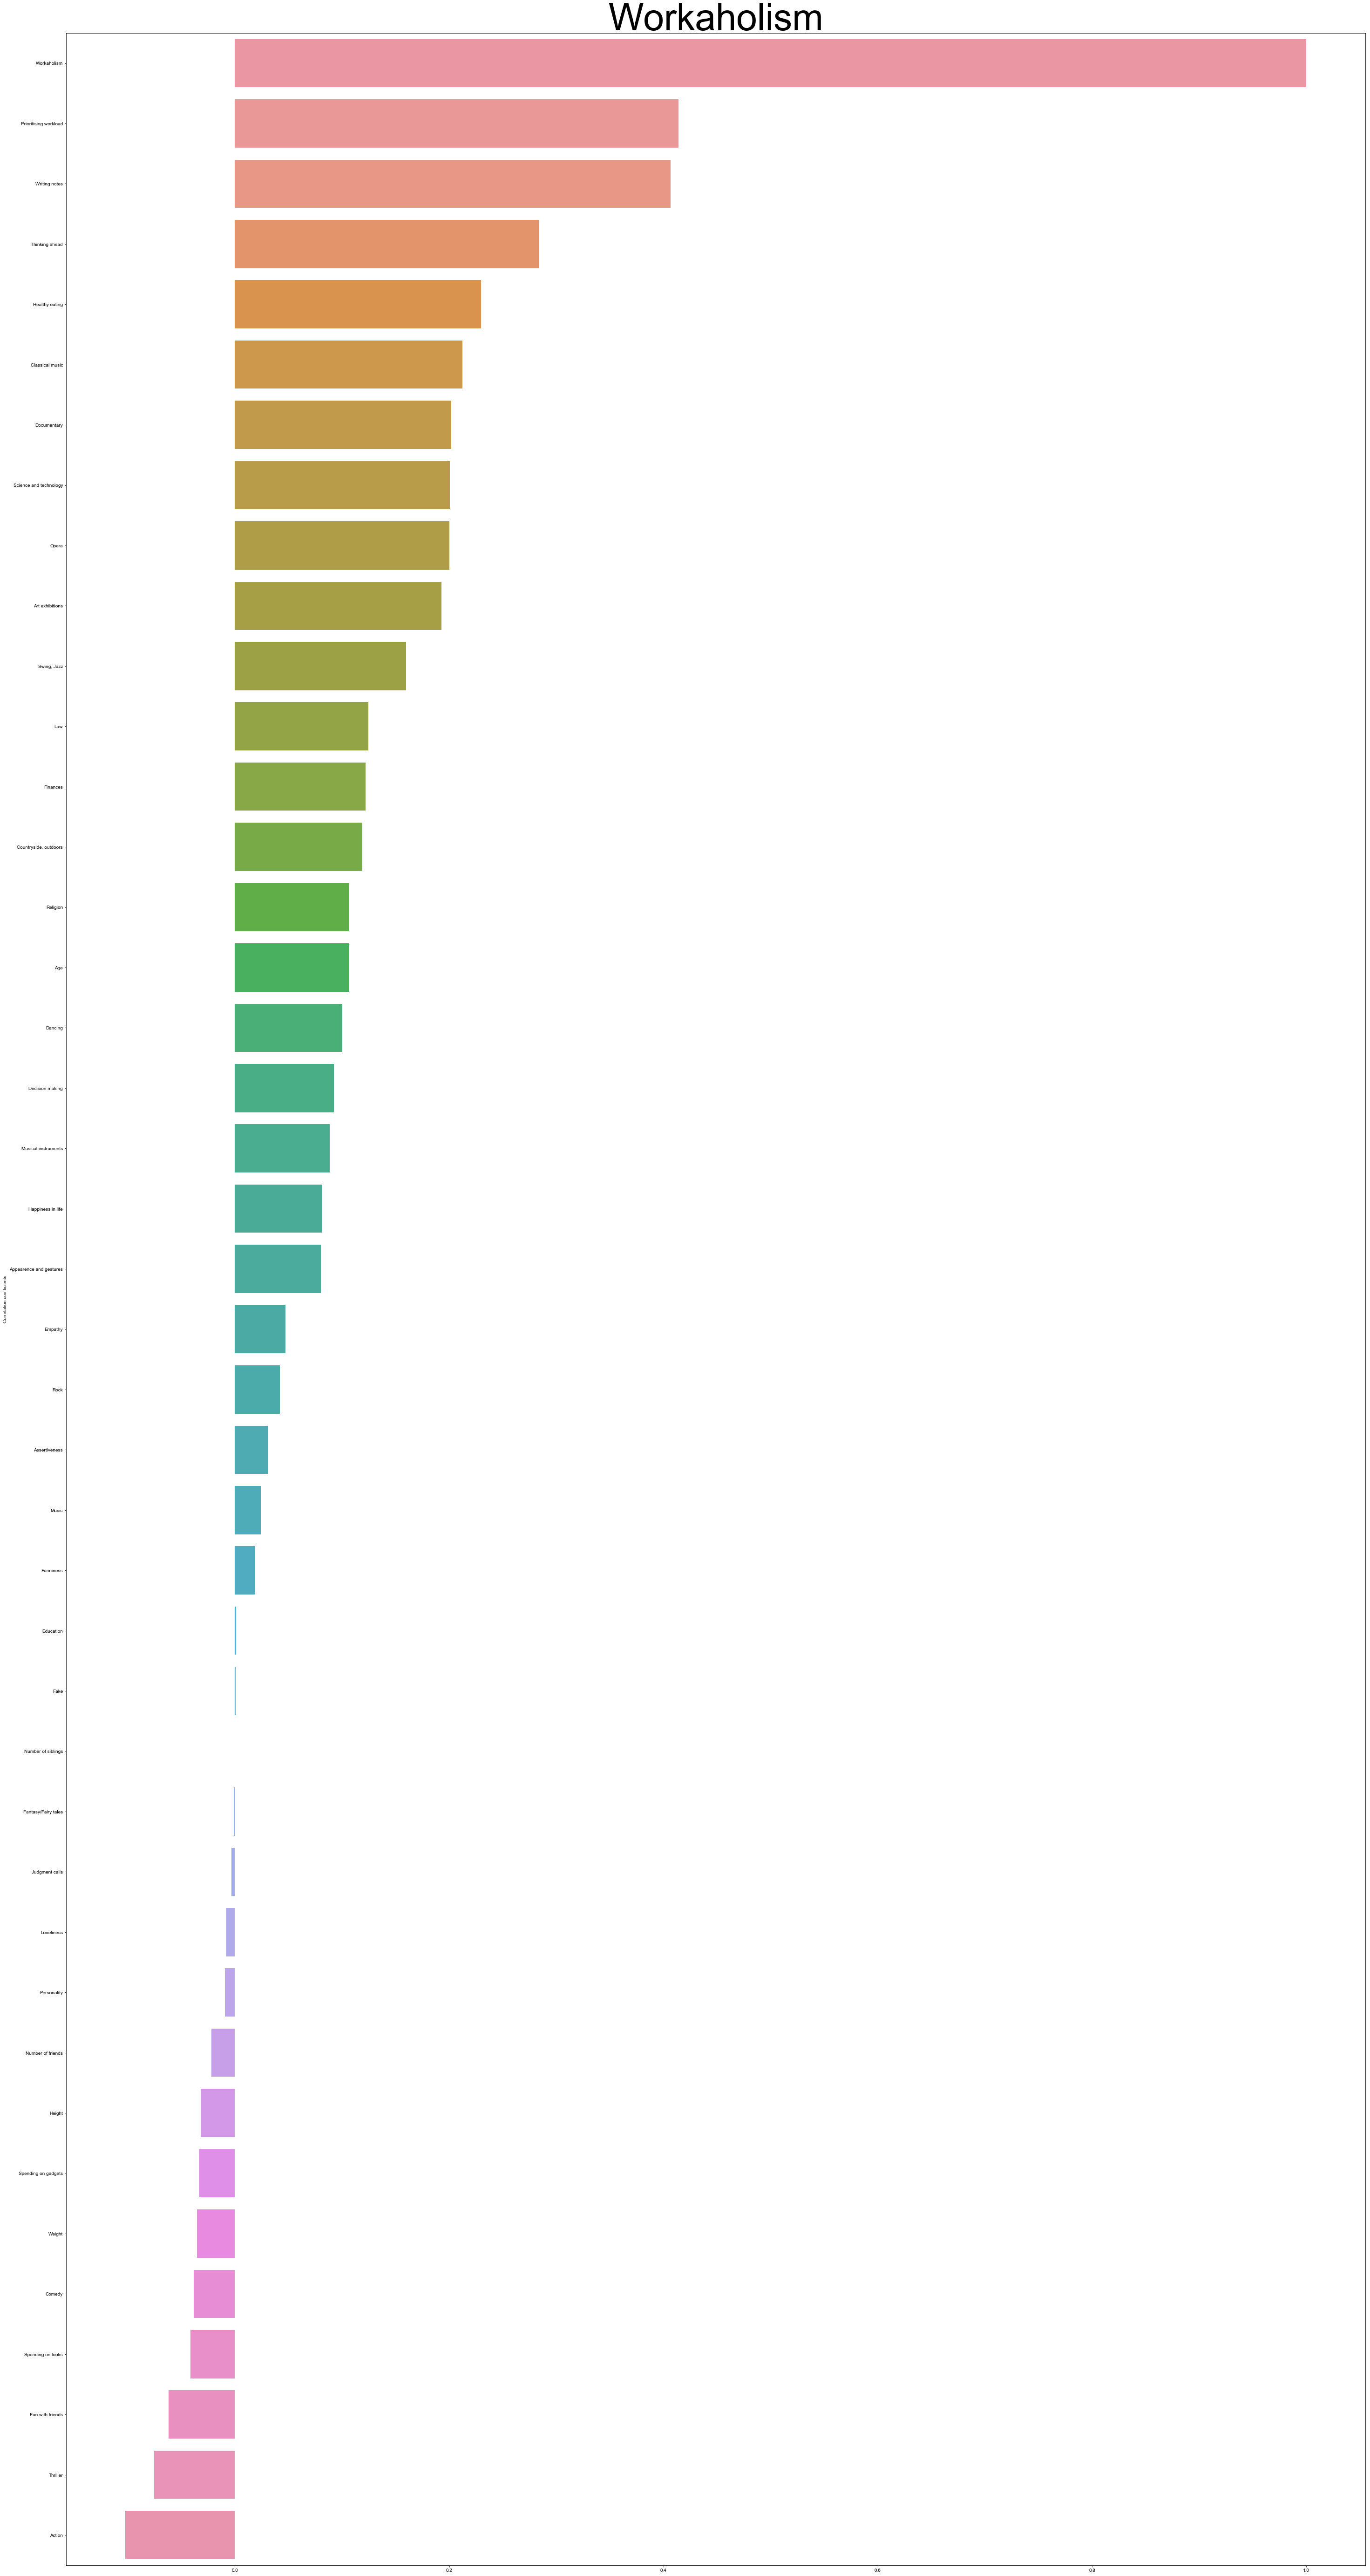

In [3]:
#x axis - column
#y axis r value

columns = []
values = []
_dict = collections.defaultdict()
testColumn = 'Workaholism'


for column in df.columns:
  temp = np.corrcoef(df[testColumn], df[column])[0][1] # Get cor coef for each feature
  _dict[column] = temp
    
for w in sorted(_dict, key=_dict.get, reverse=True):
    columns.append(w)
    values.append(_dict[w])
    
def plot(x, y, figsize):
    fig, ax = plt.subplots(figsize=figsize)
    ax.set_title(testColumn, size = 80)
    sns.barplot(x=y, y=x, orient = 'h')
    ax.set_ylabel("Correlation coefficients")
    #plt.xlabel(xlabel = columns, size = 10)
    sns.set(font_scale=7)


plot(columns,values, figsize=(50, 100))

We see as expected that there is a strong correlation with ‘Prioritising workload’, and ‘thinking ahead’. We also see some intuitive negative correlations with ‘fun with friends’. Finally the lack of correlation between some of the features like ‘education’ is somewhat surprising. 

Let's see if our results are significant with a t-test. First let's divide the results into those with a large affinity towards workaholism and those who have a small

In [4]:
large = df[df['Workaholism'] > 3]
small = df[df['Workaholism'] < 3]
print('number of large ' +  str(len(large)))
print('number of small ' + str(len(small)))

number of large 344
number of small 372


Let the null hypothesis be that there is no significant difference between prioritising workload whether coming from the big sample or the small. 
Let our significance level be .05
We can apply the CLT since the distributions are normal. 

First let's see what the difference actually is 

In [5]:
sigLevel = .05
largeMean = large['Prioritising workload'].mean()
smallMean = small['Prioritising workload'].mean()
print('The large mean is ' + str(largeMean) + ' and the small mean is ' + str(smallMean))
print('the total difference is ' + str(largeMean - smallMean))

The large mean is 3.1744186046511627 and the small mean is 2.0591397849462365
the total difference is 1.1152788197049261


Now let's see if this difference is significant

In [6]:
stats.ttest_ind(large['Prioritising workload'],small['Prioritising workload'])

Ttest_indResult(statistic=13.234471725779063, pvalue=6.475002827704593e-36)

This p statistic is very small. It is therefore likely that this correlation is significant. 
Let's see what this difference actually is. 

Let's calculate the p values more efficently in a loop. 

In [7]:
sigColumns = []
count = 0

for i, column in enumerate(columns):
    #if values[i] < .05 # If there is a significant correlation
      print('for the column ' + str(column))
      print('the correlation coeficent is  ' + str(values[i]))
      largeMean = large[column].mean()
      smallMean = small[column].mean()
      #print('The large mean is ' + str(largeMean) + ' and the small mean is ' + str(smallMean))
      print('the total difference is ' + str(largeMean - smallMean))
      stat, pVal = stats.ttest_ind(large[column],small[column])
      print('the p val is ' + str(pVal))
      print()
      count = count +1
      if pVal < .05:
        sigColumns.append(column)

for the column Workaholism
the correlation coeficent is  0.9999999999999998
the total difference is 2.8473278145407006
the p val is 0.0

for the column Prioritising workload
the correlation coeficent is  0.41420185325258213
the total difference is 1.1152788197049261
the p val is 6.475002827704593e-36

for the column Writing notes
the correlation coeficent is  0.4064926199300132
the total difference is 1.2462803200800203
the p val is 6.337279200708932e-33

for the column Thinking ahead
the correlation coeficent is  0.2840703459444896
the total difference is 0.7066269732775794
the p val is 1.1054448940359247e-16

for the column Healthy eating
the correlation coeficent is  0.2298608793308776
the total difference is 0.4499319343241961
the p val is 2.315941762361617e-10

for the column Classical music
the correlation coeficent is  0.21242815311395005
the total difference is 0.5841531108101048
the p val is 5.093402902587767e-10

for the column Documentary
the correlation coeficent is  0.2019

In [8]:
print("The columns with significant correlations are ")
print(sigColumns)

The columns with significant correlations are 
['Workaholism', 'Prioritising workload', 'Writing notes', 'Thinking ahead', 'Healthy eating', 'Classical music', 'Documentary', 'Science and technology', 'Opera', 'Art exhibitions', 'Swing, Jazz', 'Law', 'Finances', 'Countryside, outdoors', 'Religion', 'Age', 'Dancing', 'Decision making', 'Musical instruments', 'Happiness in life', 'Appearence and gestures', 'Thriller', 'Action']


In [9]:
print(len(sigColumns))

23


Let's now find a 95 percent confidence interval for fun with friends 

In [17]:
small = small.iloc[:344]
largeMean = large['Fun with friends'].mean()
smallMean = small['Fun with friends'].mean()
meanDif = largeMean - smallMean
difArray = large[['Fun with friends']] - small[['Fun with friends']]
std = difArray.std()
large = large.reset_index()
small = small.reset_index()



In [19]:
CriticalVal = 1.96
Error = std/np.sqrt(len(difArray))
marginOFError = CriticalVal * Error
print('A 95 percent CI is (' + str(meanDif - Error) + ', ' + str(meanDif+Error))

A 95 percent CI is (Fun with friends   -0.144211
dtype: float64, Fun with friends   -0.030207
dtype: float64


The CI represents the range that the true parameter can be 95 percent of the time. Because 0 is not included within this range, we see that it is unlikely that there is no correlation. 
It's worth noting though that the max of the CI, -.03, is not a very strong correlation.